# Pre - Setting

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:

# df = pd.read_csv('/content/drive/My Drive/UIUC Material/BADM 557/BADM 557/final_project/data.csv', low_memory=False) # provide the full path
df = pd.read_csv('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project/data.csv', low_memory=False) # provide the full path
#reference: https://www.kaggle.com/datasets/diishasiing/revenue-for-cab-drivers

## Exploratory Data Analysis


In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


1. **VendorID**: A unique identifier for the taxi vendor or service provider.
2. **tpep_pickup_datetime**: The date and time when the passenger was picked up.
3. **tpep_dropoff_datetime**: The date and time when the passenger was dropped off.
4. **passenger_count**: The number of passengers in the taxi.
5. **trip_distance**: The total distance of the trip in miles or kilometers.
6. **RatecodeID**: The rate code assigned to the trip, representing fare types.
7. **store_and_fwd_flag**: Indicates whether the trip data was stored locally and then forwarded later (Y/N).
8. **PULocationID**: The unique identifier for the pickup location (zone or area).
9. **DOLocationID**: The unique identifier for the drop-off location (zone or area).
10. **payment_type:** The method of payment used by the passenger (e.g., cash, card).
11. **fare_amount**: The base fare for the trip.
12. **extra**: Additional charges applied during the trip (e.g., night surcharge).
13. **mta_tax**: The tax imposed by the Metropolitan Transportation Authority.
14. **tip_amount**: The tip given to the driver, if applicable.
15. **tolls_amount**: The total amount of tolls charged during the trip.
16. **improvement_surcharge**: A surcharge imposed for the improvement of services.
17. **total_amount**: The total fare amount, including all charges and surcharges.
18. **congestion_surcharge**: An additional charge for trips taken during high traffic
ng high traffic congestion times.congestion times.congestion times.

In [5]:
#describe without scientific notation for the code chunk
with pd.option_context('display.float_format', '{:.2f}'.format):

    print(df.describe())

        VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count 6339567.00       6339567.00     6405008.00  6339567.00    6405008.00   
mean        1.67             1.52           2.93        1.06        164.73   
std         0.47             1.15          83.16        0.81         65.54   
min         1.00             0.00         -30.62        1.00          1.00   
25%         1.00             1.00           0.96        1.00        132.00   
50%         2.00             1.00           1.60        1.00        162.00   
75%         2.00             2.00           2.93        1.00        234.00   
max         2.00             9.00      210240.07       99.00        265.00   

       DOLocationID  payment_type  fare_amount      extra    mta_tax  \
count    6405008.00    6339567.00   6405008.00 6405008.00 6405008.00   
mean         162.66          1.27        12.69       1.12       0.49   
std           69.91          0.47        12.13       1.26       0.07   
min      

In [6]:
#checking for null value in the dataset
df.isna().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

# Q1.Identify patterns in trip demand by location and time

Starting taxi demand analysis...
Output will be saved to: /Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project


Processing Data:  98%|█████████▊| 6300000/6405008 [00:13<00:00, 543387.71it/s]/var/folders/d1/s2qxz98s235glk3wmsk815zc0000gn/T/ipykernel_4481/826693510.py:61: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
Processing Data: 100%|██████████| 6405008/6405008 [00:13<00:00, 475028.61it/s]
/var/folders/d1/s2qxz98s235glk3wmsk815zc0000gn/T/ipykernel_4481/826693510.py:250: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Data exported to /Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project


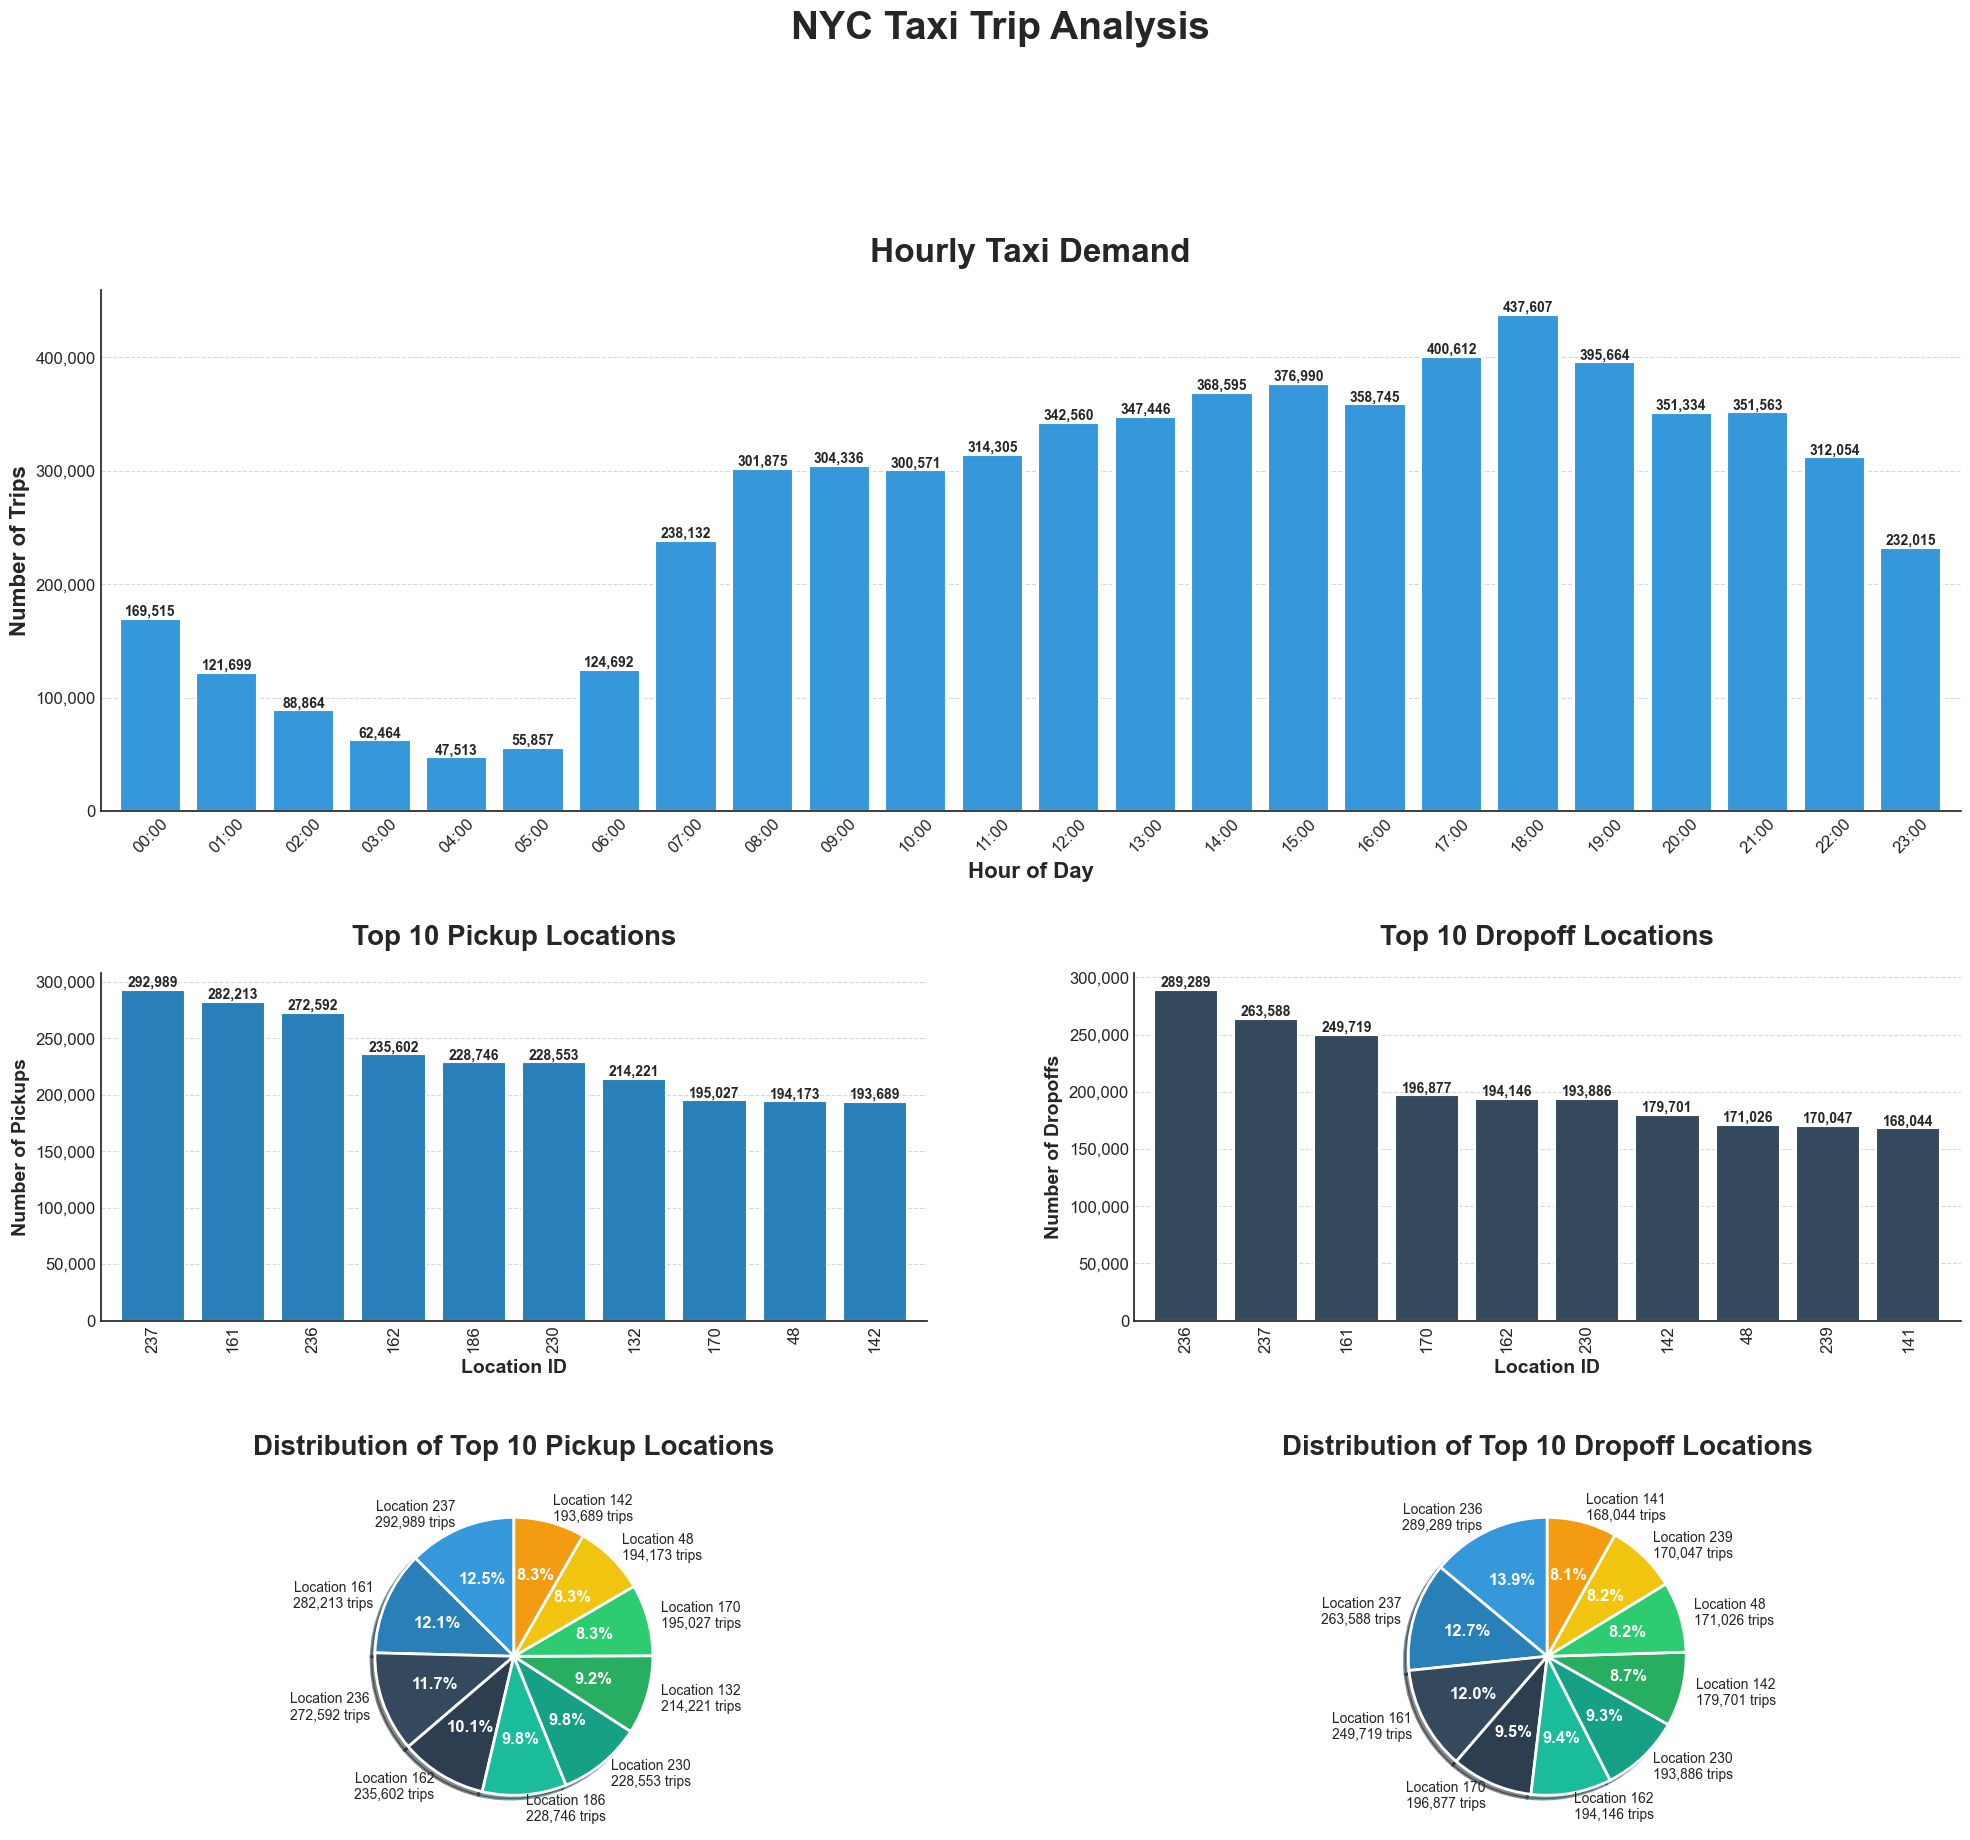


=== DETAILED ANALYSIS RESULTS ===

Total Trips Analyzed: 6,405,008

Top 10 Pickup Locations (Location ID : Number of Pickups):
237    292989
161    282213
236    272592
162    235602
186    228746
230    228553
132    214221
170    195027
48     194173
142    193689
dtype: int64

Top 10 Dropoff Locations (Location ID : Number of Dropoffs):
236    289289
237    263588
161    249719
170    196877
162    194146
230    193886
142    179701
48     171026
239    170047
141    168044
dtype: int64

Hourly Demand (Hour : Number of Trips):
0     169515
1     121699
2      88864
3      62464
4      47513
5      55857
6     124692
7     238132
8     301875
9     304336
10    300571
11    314305
12    342560
13    347446
14    368595
15    376990
16    358745
17    400612
18    437607
19    395664
20    351334
21    351563
22    312054
23    232015
Name: Trips, dtype: int64

Analysis complete! All files have been saved in the same directory as the input data.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm
import os

def reduce_memory_usage(df):
    """
    Iterate through all numeric columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_memory = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_memory = df.memory_usage().sum() / 1024**2
    print(f'Memory usage reduced from {start_memory:.2f} MB to {end_memory:.2f} MB')

    return df

def process_large_dataset(file_path, chunk_size=100000):
    """
    Process large dataset in chunks
    """
    # Initialize aggregation containers
    total_trips = 0
    hourly_demand = np.zeros(24, dtype=int)
    location_pickup_counts = {}
    location_dropoff_counts = {}

    # Create a progress bar for chunks
    total_rows = sum(1 for _ in open(file_path, 'r')) - 1  # Subtract header
    chunks = pd.read_csv(file_path, chunksize=chunk_size)

    with tqdm(total=total_rows, desc="Processing Data") as pbar:
        for chunk in chunks:
            # Convert datetime columns
            chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'])

            # Extract hour
            chunk['pickup_hour'] = chunk['tpep_pickup_datetime'].dt.hour

            # Aggregate hourly demand
            hour_counts = chunk['pickup_hour'].value_counts()
            hourly_demand += hour_counts.reindex(range(24), fill_value=0).values

            # Aggregate location popularity
            pickup_counts = chunk['PULocationID'].value_counts()
            dropoff_counts = chunk['DOLocationID'].value_counts()

            for loc, count in pickup_counts.items():
                location_pickup_counts[loc] = location_pickup_counts.get(loc, 0) + count

            for loc, count in dropoff_counts.items():
                location_dropoff_counts[loc] = location_dropoff_counts.get(loc, 0) + count

            total_trips += len(chunk)
            pbar.update(len(chunk))

    # Convert aggregations to pandas Series for easy visualization
    hourly_demand_series = pd.Series(hourly_demand, index=range(24), name='Trips')
    pickup_popularity = pd.Series(location_pickup_counts).nlargest(10)
    dropoff_popularity = pd.Series(location_dropoff_counts).nlargest(10)

    return {
        'total_trips': total_trips,
        'hourly_demand': hourly_demand_series,
        'pickup_popularity': pickup_popularity,
        'dropoff_popularity': dropoff_popularity
    }

def export_analysis_data(analysis_results, output_dir):
    """
    Export analysis results to CSV files
    """
    # Export hourly demand
    hourly_demand_df = analysis_results['hourly_demand'].reset_index()
    hourly_demand_df.columns = ['Hour', 'Number_of_Trips']
    hourly_demand_df.to_csv(os.path.join(output_dir, 'hourly_demand.csv'), index=False)

    # Export pickup popularity
    pickup_df = analysis_results['pickup_popularity'].reset_index()
    pickup_df.columns = ['LocationID', 'Number_of_Pickups']
    pickup_df.to_csv(os.path.join(output_dir, 'top_pickup_locations.csv'), index=False)

    # Export dropoff popularity
    dropoff_df = analysis_results['dropoff_popularity'].reset_index()
    dropoff_df.columns = ['LocationID', 'Number_of_Dropoffs']
    dropoff_df.to_csv(os.path.join(output_dir, 'top_dropoff_locations.csv'), index=False)

    # Export summary statistics
    summary_df = pd.DataFrame({
        'Metric': ['Total_Trips'],
        'Value': [analysis_results['total_trips']]
    })
    summary_df.to_csv(os.path.join(output_dir, 'summary_statistics.csv'), index=False)

    print(f"\nData exported to {output_dir}")

def visualize_demand_patterns(analysis_results, output_dir):
    """
    Create enhanced visualizations with clearer value labels
    """
    # Set style and color palette
    plt.style.use('seaborn-v0_8-white')
    custom_colors = ['#3498db', '#2980b9', '#34495e', '#2c3e50', '#1abc9c',
                    '#16a085', '#27ae60', '#2ecc71', '#f1c40f', '#f39c12']

    # Create figure with custom layout
    fig = plt.figure(figsize=(24, 20))
    gs = fig.add_gridspec(3, 2, height_ratios=[1.5, 1, 1], hspace=0.4, wspace=0.25)

    # Hourly Demand
    ax1 = fig.add_subplot(gs[0, :])
    bars = analysis_results['hourly_demand'].plot(kind='bar', ax=ax1,
                                                color=custom_colors[0],
                                                width=0.8,
                                                edgecolor='white',
                                                linewidth=1.5)

    # Add value labels with better formatting
    for i, v in enumerate(analysis_results['hourly_demand']):
        ax1.text(i, v, f'{v:,.0f}',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                rotation=0)

    ax1.set_title('Hourly Taxi Demand', pad=20, size=24, weight='bold')
    ax1.set_xlabel('Hour of Day', size=16, weight='bold')
    ax1.set_ylabel('Number of Trips', size=16, weight='bold')
    ax1.tick_params(axis='both', labelsize=12)
    ax1.grid(axis='y', linestyle='--', alpha=0.3, color='gray')
    ax1.set_xticks(range(24))
    ax1.set_xticklabels([f'{i:02d}:00' for i in range(24)], rotation=45)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Format y-axis with comma separator
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Pickup Locations Bar Chart
    ax2 = fig.add_subplot(gs[1, 0])
    bars = analysis_results['pickup_popularity'].plot(kind='bar', ax=ax2,
                                                    color=custom_colors[1],
                                                    width=0.8,
                                                    edgecolor='white',
                                                    linewidth=1.5)

    # Add value labels for pickup locations
    for i, v in enumerate(analysis_results['pickup_popularity']):
        ax2.text(i, v, f'{v:,.0f}',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                rotation=0)

    ax2.set_title('Top 10 Pickup Locations', pad=20, size=20, weight='bold')
    ax2.set_xlabel('Location ID', size=14, weight='bold')
    ax2.set_ylabel('Number of Pickups', size=14, weight='bold')
    ax2.tick_params(axis='both', labelsize=12)
    ax2.grid(axis='y', linestyle='--', alpha=0.3, color='gray')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Dropoff Locations Bar Chart
    ax3 = fig.add_subplot(gs[1, 1])
    bars = analysis_results['dropoff_popularity'].plot(kind='bar', ax=ax3,
                                                     color=custom_colors[2],
                                                     width=0.8,
                                                     edgecolor='white',
                                                     linewidth=1.5)

    # Add value labels for dropoff locations
    for i, v in enumerate(analysis_results['dropoff_popularity']):
        ax3.text(i, v, f'{v:,.0f}',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                rotation=0)

    ax3.set_title('Top 10 Dropoff Locations', pad=20, size=20, weight='bold')
    ax3.set_xlabel('Location ID', size=14, weight='bold')
    ax3.set_ylabel('Number of Dropoffs', size=14, weight='bold')
    ax3.tick_params(axis='both', labelsize=12)
    ax3.grid(axis='y', linestyle='--', alpha=0.3, color='gray')
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Pickup Distribution Pie Chart
    ax4 = fig.add_subplot(gs[2, 0])
    wedges, texts, autotexts = ax4.pie(analysis_results['pickup_popularity'],
                                      labels=[f'Location {i}\n{v:,.0f} trips'
                                             for i, v in zip(analysis_results['pickup_popularity'].index,
                                                           analysis_results['pickup_popularity'].values)],
                                      autopct='%1.1f%%',
                                      colors=custom_colors,
                                      shadow=True,
                                      startangle=90,
                                      wedgeprops={'edgecolor': 'white', 'linewidth': 2})
    plt.setp(autotexts, size=12, weight='bold', color='white')
    plt.setp(texts, size=10)
    ax4.set_title('Distribution of Top 10 Pickup Locations',
                  pad=20, size=20, weight='bold')

    # Dropoff Distribution Pie Chart
    ax5 = fig.add_subplot(gs[2, 1])
    wedges, texts, autotexts = ax5.pie(analysis_results['dropoff_popularity'],
                                      labels=[f'Location {i}\n{v:,.0f} trips'
                                             for i, v in zip(analysis_results['dropoff_popularity'].index,
                                                           analysis_results['dropoff_popularity'].values)],
                                      autopct='%1.1f%%',
                                      colors=custom_colors,
                                      shadow=True,
                                      startangle=90,
                                      wedgeprops={'edgecolor': 'white', 'linewidth': 2})
    plt.setp(autotexts, size=12, weight='bold', color='white')
    plt.setp(texts, size=10)
    ax5.set_title('Distribution of Top 10 Dropoff Locations',
                  pad=20, size=20, weight='bold')

    # Add a main title to the figure
    fig.suptitle('NYC Taxi Trip Analysis', size=28, weight='bold', y=1.02)

    # Adjust layout
    plt.tight_layout()

    # Save the figure with high resolution and white background
    plt.savefig(os.path.join(output_dir, 'demand_patterns.png'),
                dpi=300,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')
    plt.show()

    # Print detailed insights
    print("\n=== DETAILED ANALYSIS RESULTS ===")
    print(f"\nTotal Trips Analyzed: {analysis_results['total_trips']:,}")
    print("\nTop 10 Pickup Locations (Location ID : Number of Pickups):")
    print(analysis_results['pickup_popularity'])
    print("\nTop 10 Dropoff Locations (Location ID : Number of Dropoffs):")
    print(analysis_results['dropoff_popularity'])
    print("\nHourly Demand (Hour : Number of Trips):")
    print(analysis_results['hourly_demand'])

def main(file_path):
    """
    Main function to run the entire analysis
    """
    print("Starting taxi demand analysis...")

    # Get the directory where the input file is located
    output_dir = os.path.dirname(os.path.abspath(file_path))
    print(f"Output will be saved to: {output_dir}")

    # Process the large dataset
    analysis_results = process_large_dataset(file_path)

    # Export the data
    export_analysis_data(analysis_results, output_dir)

    # Visualize results and print insights
    visualize_demand_patterns(analysis_results, output_dir)

    print("\nAnalysis complete! All files have been saved in the same directory as the input data.")

# Run the analysis
if __name__ == "__main__":
    main('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project/data.csv')

# Q2. K-mean Cluster: number of passenger and trip distance

## Pre-set K-Mean analysis for passenger_count & trip_distance

In [8]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans

In [9]:
df_tp = df[['passenger_count','trip_distance']]
df_tp = df_tp[df_tp['trip_distance']> 0]
df_tp = df_tp[df_tp['passenger_count']> 0]
print(df_tp)

         passenger_count  trip_distance
0                    1.0           1.20
1                    1.0           1.20
2                    1.0           0.60
3                    1.0           0.80
5                    1.0           0.03
...                  ...            ...
6339561              1.0           4.11
6339562              1.0           2.10
6339563              1.0           2.13
6339564              1.0           2.55
6339565              1.0           1.61

[6159922 rows x 2 columns]


## Standarize the trip distance by using zscore

In [10]:
#Standarize
df_tp_no_na = df_tp.dropna()  # Removes rows with any NA values
clmns = ['passenger_count','trip_distance']
df_tp_standardized = stats.zscore(df_tp_no_na['trip_distance'])
df_tp_no_na['standardized_trip'] = df_tp_standardized
clmns2 = ['passenger_count','standardized_trip']
df_tp_standardized = df_tp_no_na[clmns2]
print(df_tp_standardized)

         passenger_count  standardized_trip
0                    1.0          -0.446404
1                    1.0          -0.446404
2                    1.0          -0.605663
3                    1.0          -0.552576
5                    1.0          -0.756958
...                  ...                ...
6339561              1.0           0.326001
6339562              1.0          -0.207516
6339563              1.0          -0.199553
6339564              1.0          -0.088072
6339565              1.0          -0.337577

[6159922 rows x 2 columns]


In [11]:
df_tp_standardized.shape

(6159922, 2)

## Find the Optimal Number of Clusters

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [13]:
standardized_data = df_tp_standardized #making a copy of the Normalized z-score data for the Elbow optimization
SSD = []
Range = range(1,10)
for k in Range:
    kmean = KMeans(n_clusters = k)
    kmean = kmean.fit(standardized_data)
    SSD.append(kmean.inertia_)

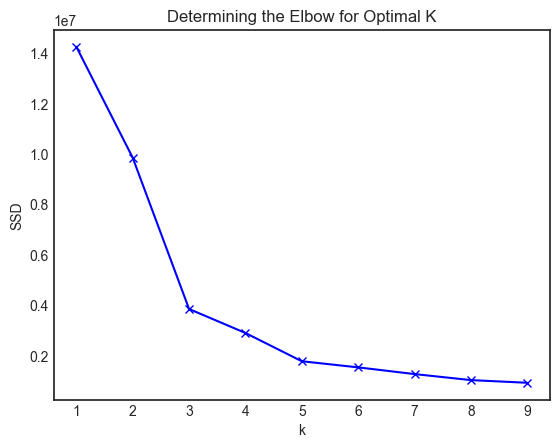

In [14]:
plt.plot(Range, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('SSD')
plt.title('Determining the Elbow for Optimal K')
plt.show()

## Initializes and Train the K-means cluster model

In [15]:
#Cluster the data

kmeans = KMeans(n_clusters=3, max_iter=150, random_state=80).fit(df_tp_standardized)
                                          #  initializes and trains the K-means clustering model
labels = kmeans.labels_
centroids = kmeans.cluster_centers_       # retrieves the coordinates of the cluster centers
pd.DataFrame(labels,columns=['cluster'])  # creates a pandas DataFrame from the cluster labels

,cluster
0,1
1,1
2,1
3,1
4,1
...,...
6159917,1
6159918,1
6159919,1
6159920,1


In [16]:
df_tp_no_na['Clusters'] = labels # drop NA value in "Clusters"

In [17]:
clmns.extend(['Clusters'])

In [18]:
# the average values of the features (like 'passenger_count' and 'trip_distance') for the data points belonging to each cluster.
print (df_tp_no_na[clmns].groupby(['Clusters']).mean())


          passenger_count  trip_distance
Clusters                                
0                1.360896      13.981940
1                1.171068       1.952526
2                4.358556       2.337741


## Cluster Point
createing a scatter plot showing the relationship between passenger_count and trip_distance for taxi trips. The points are colored to represent different clusters determined by a previous clustering algorithm. The plot aims to visually show how these trips are grouped based on these two features and provide insight into their characteristics within each cluster. Additionally, the code prints the center points of the clusters.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

[[ 1.35893745  2.93630896]
 [ 1.17112903 -0.24757075]
 [ 4.35860851 -0.14434735]]


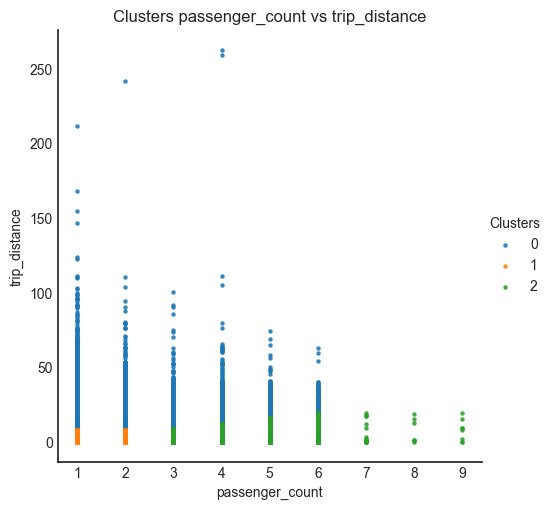

In [20]:
sns.lmplot(x='passenger_count', y='trip_distance',
           data=df_tp_no_na,
           fit_reg=False,
           hue="Clusters",
           scatter_kws={"marker": "o",
                        "s": 5})                      # create a scatter plot
plt.title('Clusters passenger_count vs trip_distance')
plt.xlabel('passenger_count')
plt.ylabel('trip_distance')

# Plot the centroids as a blue X
print(centroids)

**Conclusion**

Based on the graph, we can see that in our sample, Cluster 1 is the biggest cluster. Therefore, in NewYork taxi service, most of the taxi services for the trips that 2 passangers, 14 miles distance

In [21]:
df_tp['Cluster'] = labels
print(df_tp)

         passenger_count  trip_distance  Cluster
0                    1.0           1.20        1
1                    1.0           1.20        1
2                    1.0           0.60        1
3                    1.0           0.80        1
5                    1.0           0.03        1
...                  ...            ...      ...
6339561              1.0           4.11        1
6339562              1.0           2.10        1
6339563              1.0           2.13        1
6339564              1.0           2.55        1
6339565              1.0           1.61        1

[6159922 rows x 3 columns]


Use K Mean Cluster to find

In [22]:
#df_tp.to_csv('data_2.csv', index=False)

# Q3. Payment types vary across clusters of trips

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
!pip install statsmodels
import statsmodels.api as sm

df = pd.read_csv('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project/data.csv')
df.head()

/var/folders/d1/s2qxz98s235glk3wmsk815zc0000gn/T/ipykernel_4481/3983771058.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project/data.csv')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [24]:
#change date column to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
#coverting duration to minutes
df['duration'] = df['duration'].dt.total_seconds()/60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [25]:
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [26]:
df.isnull().sum()
df.dropna(inplace = True)
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [27]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [28]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [29]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [30]:
df['payment_type'] = df['payment_type'].map({1:'Card', 2: 'Cash'})
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x346adac10>,
 'caps': [<matplotlib.lines.Line2D at 0x346adae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x346adaad0>],
 'medians': [<matplotlib.lines.Line2D at 0x346adb110>],
 'fliers': [<matplotlib.lines.Line2D at 0x346adb250>],
 'means': []}

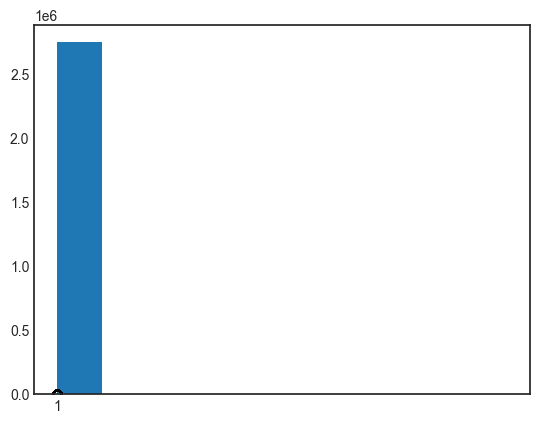

In [31]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]
plt.hist(df['fare_amount'])
plt.boxplot(df['fare_amount'])

In [32]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

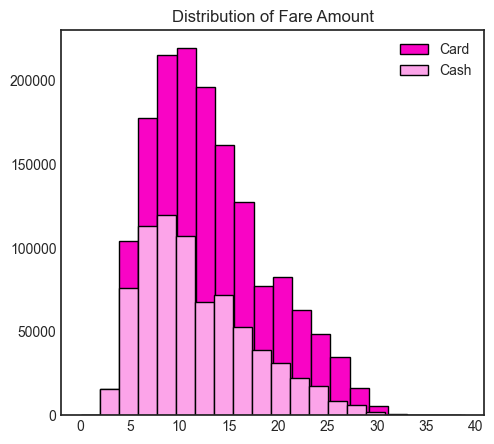

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#F904C5')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FCA4E9')
plt.legend(['Card', 'Cash'])
plt.show()

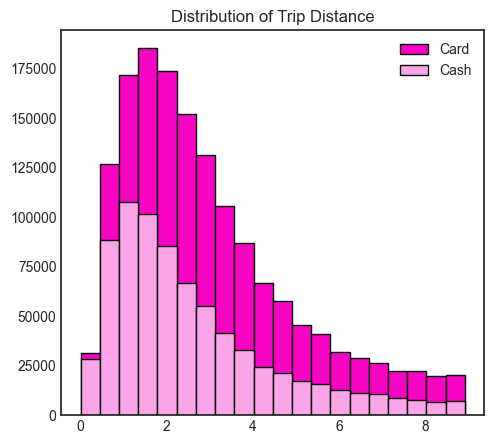

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#F904C5')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FCA4E9')
plt.legend(['Card', 'Cash'])
plt.show()

# Q4. How do surcharges correlate with travel locations and times?

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Obtain the Required Data and Make Necessary Adjustments

In [36]:
df = pd.read_csv('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project/data.csv')
df_sc = df[['tpep_pickup_datetime', 'PULocationID', 'DOLocationID', 'congestion_surcharge']]

# Filter negative value of surcharge, which may be due to coupon or sale activities
df_sc = df_sc[df_sc['congestion_surcharge'] >= 0]

# Convert 'tpep_pickup_datetime' from object to datetime
df_sc['tpep_pickup_datetime'] = pd.to_datetime(df_sc['tpep_pickup_datetime'])

# Extract only the time part (remove time information)
df_sc['pickup_time'] = df_sc['tpep_pickup_datetime'].dt.time

# Convert time to numerical value in hours since midnight, and round(2) to be easy to read
df_sc['pickup_hours'] = (df_sc['tpep_pickup_datetime'].dt.hour + df_sc['tpep_pickup_datetime'].dt.minute / 60).round(2)
print(df_sc.describe())

# Check the data
print(df_sc.head())


/var/folders/d1/s2qxz98s235glk3wmsk815zc0000gn/T/ipykernel_4481/2138073321.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project/data.csv')


                tpep_pickup_datetime  PULocationID  DOLocationID  \
count                        6389582  6.389582e+06  6.389582e+06   
mean   2020-01-17 03:05:29.111790336  1.647314e+02  1.626621e+02   
min              2003-01-01 00:07:17  1.000000e+00  1.000000e+00   
25%              2020-01-09 17:10:58  1.320000e+02  1.130000e+02   
50%              2020-01-16 23:15:02  1.620000e+02  1.620000e+02   
75%              2020-01-24 18:24:16  2.340000e+02  2.340000e+02   
max              2021-01-02 01:12:10  2.650000e+02  2.650000e+02   
std                              NaN  6.554187e+01  6.991608e+01   

       congestion_surcharge  pickup_hours  
count          6.389582e+06  6.389582e+06  
mean           2.287192e+00  1.438839e+01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.028000e+01  
50%            2.500000e+00  1.503000e+01  
75%            2.500000e+00  1.908000e+01  
max            2.750000e+00  2.398000e+01  
std            6.976581e-01  5.8846

In [37]:

df_sc = df_sc[['PULocationID', 'DOLocationID', 'congestion_surcharge', 'pickup_hours']]

print(df_sc.head())

   PULocationID  DOLocationID  congestion_surcharge  pickup_hours
0           238           239                   2.5          0.47
1           239           238                   2.5          0.58
2           238           238                   2.5          0.78
3           238           151                   0.0          0.92
4           193           193                   0.0          0.02


In [38]:
#df_sc.to_csv('data_4.csv', index=False)

## K-Means analysis of pick-up time

/Users/iveshe/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


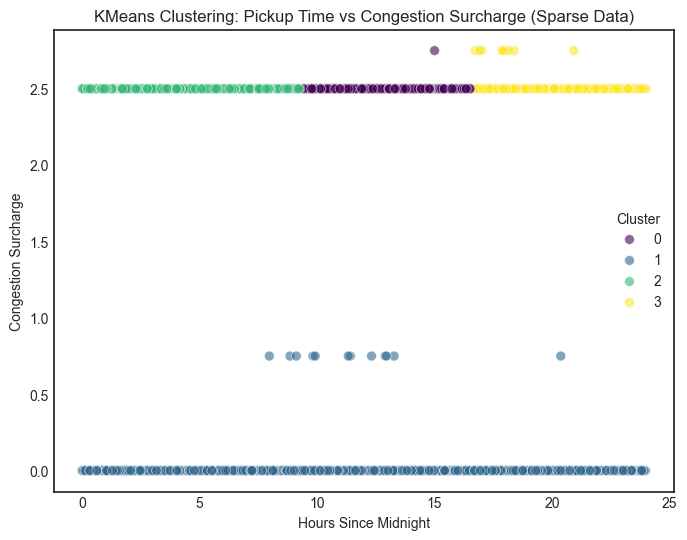

In [39]:
# Prepare features for KMeans clustering
features = df_sc[['congestion_surcharge', 'pickup_hours']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Change n_clusters value to fit your analysis
df_sc['cluster'] = kmeans.fit_predict(features_scaled)

# Randomly sample data to reduce size for faster computation
sparse_df = df_sc.sample(n=1000000, random_state=42)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pickup_hours', y='congestion_surcharge', hue='cluster', data=sparse_df, palette="viridis", s=50, alpha=0.6)
plt.xlabel('Hours Since Midnight')
plt.ylabel('Congestion Surcharge')
plt.title('KMeans Clustering: Pickup Time vs Congestion Surcharge (Sparse Data)')
plt.legend(title="Cluster")
plt.show()


Based on the visualization, it can be observed that, overall, the clustering relationship between pickup times and congestion surcharges is not very apparent. Congestion surcharges can appear at any time, and there are also times when there are no surcharges at all. However, we can still observe that surcharges tend to increase around 9:00 to 13:00 in the morning, and there is a denser and higher increase in surcharges between 17:00 and 19:00 in the evening.

This aligns with everyday intuition. From 9:00 to noon, most people are commuting to work, leading to a slight increase in congestion surcharges. Similarly, between 17:00 and 19:00, not only are many people commuting home from work, but it is also a popular time for residents to go shopping, dine out, and engage in leisure activities, leading to a more significant rise in congestion surcharges.

## Gaussian Mixture Model of analysis of location

Since KMeans requires data normalization, but Location IDs cannot be standardized, we use GMM instead.

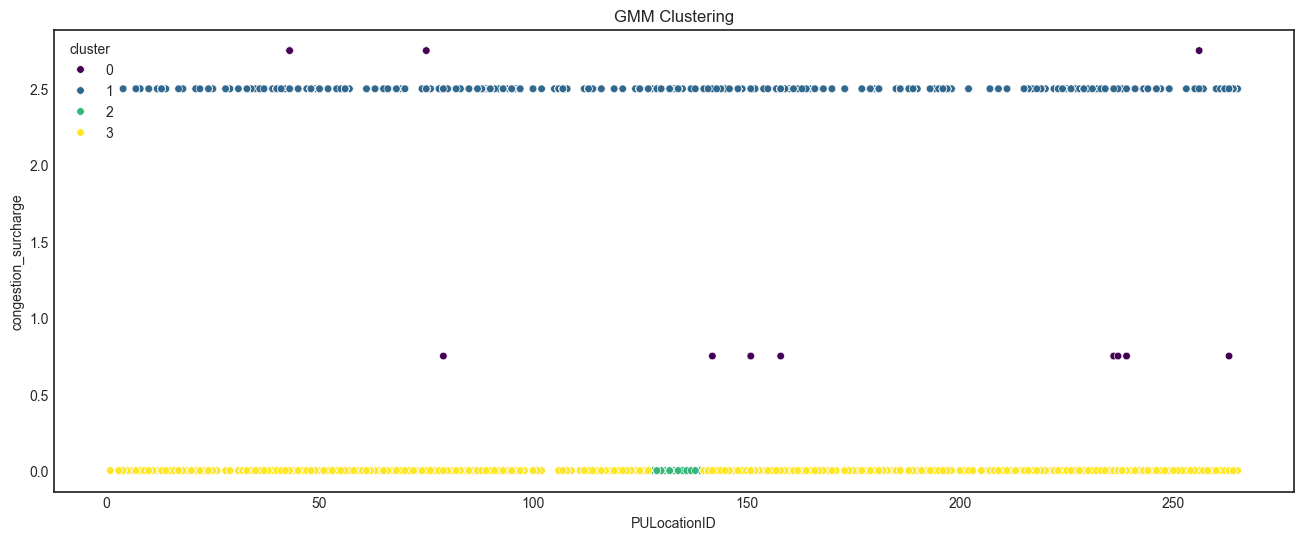

/Users/iveshe/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


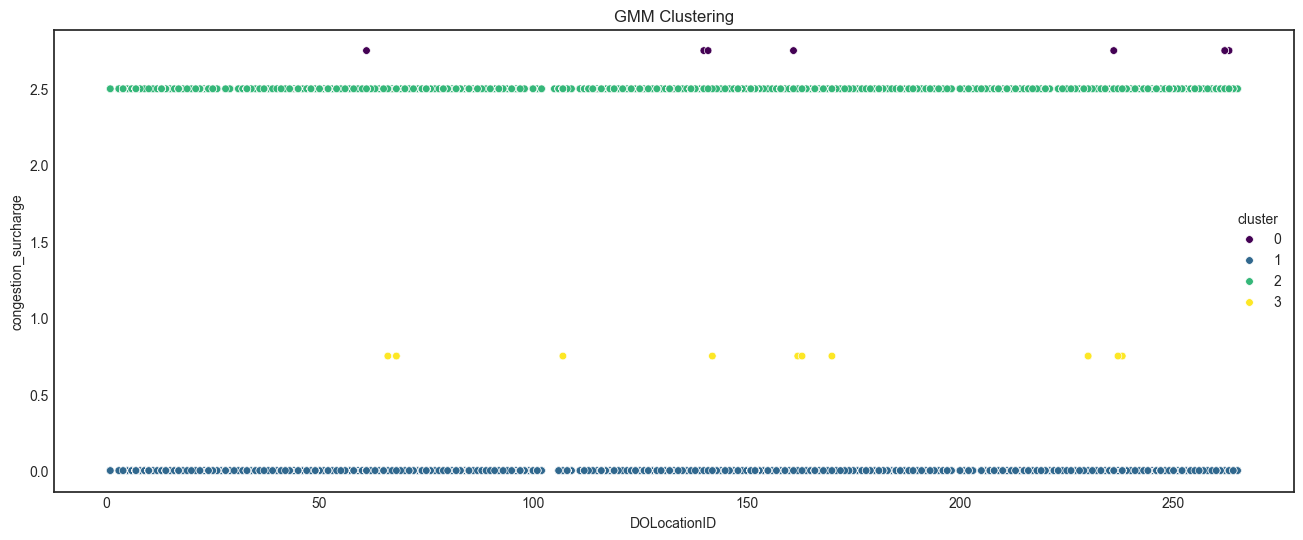

In [40]:
from sklearn.mixture import GaussianMixture

# Randomly sample data to reduce size for faster computation
df_sample = df_sc.sample(n=1000000, random_state=42)

# Train GMM model on the sample of PULocationID
features = df_sample[['PULocationID', 'congestion_surcharge']]
gmm = GaussianMixture(n_components=4, random_state=42)
df_sample['cluster'] = gmm.fit_predict(features)

# Visualization of PULocationID
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_sample, x='PULocationID', y='congestion_surcharge', hue='cluster', palette='viridis', s=30)
plt.title('GMM Clustering')
plt.show()

# Train GMM model on the sample of DOLocationID
features = df_sample[['DOLocationID', 'congestion_surcharge']]
gmm = GaussianMixture(n_components=4, random_state=42)
df_sample['cluster'] = gmm.fit_predict(features)

# Visualization of DOLocationID
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_sample, x='DOLocationID', y='congestion_surcharge', hue='cluster', palette='viridis', s=30)
plt.title('GMM Clustering')
plt.show()


## Further analysis with order counts and average congestion surcharge

In [41]:
# Group by DOLocationID, calculate the average congestion surcharge
dolocation_avg = df_sc.groupby('PULocationID').agg({
    'congestion_surcharge': ['mean', 'count']
}).reset_index()

# Rename the columns for clarity
dolocation_avg.columns = ['PULocationID', 'average_congestion_surcharge', 'order_count']

# Sort by average congestion surcharge in descending order to find the top 10
top10_dolocation_avg = dolocation_avg.nlargest(10, 'average_congestion_surcharge')

# Display the results
print("Top 10 Pickup Location IDs with Highest Average Congestion Surcharge:")
print(top10_dolocation_avg)

# Group by PULocationID, calculate the count of orders
pulocation_order_count = df_sc.groupby('PULocationID')['congestion_surcharge'].count().reset_index()

# Rename the columns for clarity
pulocation_order_count.columns = ['PULocationID', 'order_count']

# Sort by order count in descending order to find the top 10
top10_order_count = pulocation_order_count.nlargest(10, 'order_count')

# Display the results
print("Top 10 Pickup Location IDs with the Most Orders:")
print(top10_order_count)

# Find intersection of the two
common_ids = set(top10_dolocation_avg['PULocationID']).intersection(set(top10_order_count['PULocationID']))

# Display the intersection results
print("Common IDs present in both the top pickup and top dropoff locations:")
print(common_ids)


Top 10 Pickup Location IDs with Highest Average Congestion Surcharge:
     PULocationID  average_congestion_surcharge  order_count
102           105                      2.500000            2
232           237                      2.488558       292228
110           114                      2.487386        78680
234           239                      2.484200       173085
206           211                      2.483814        49378
257           262                      2.483091        85619
244           249                      2.482081       122745
182           186                      2.481395       228125
224           229                      2.480948       125317
229           234                      2.480583       187645
Top 10 Pickup Location IDs with the Most Orders:
     PULocationID  order_count
232           237       292228
157           161       281433
231           236       272037
158           162       235050
182           186       228125
225           230       

We can see, for pick up location, in the location 161 and 237, people always have high congestion surcharge.

In [42]:
# Group by DOLocationID, calculate the average congestion surcharge
dolocation_avg = df_sc.groupby('DOLocationID').agg({
    'congestion_surcharge': ['mean', 'count']
}).reset_index()

# Rename the columns for clarity
dolocation_avg.columns = ['DOLocationID', 'average_congestion_surcharge', 'order_count']

# Sort by average congestion surcharge in descending order to find the top 10
top10_dolocation_avg = dolocation_avg.nlargest(10, 'average_congestion_surcharge')

# Display the results
print("Top 10 Dropoff Location IDs with Highest Average Congestion Surcharge:")
print(top10_dolocation_avg)

# Group by DOLocationID, calculate the count of orders
dolocation_order_count = df_sc.groupby('DOLocationID')['congestion_surcharge'].count().reset_index()

# Rename the columns for clarity
dolocation_order_count.columns = ['DOLocationID', 'order_count']

# Sort by order count in descending order to find the top 10
top10_dolocation_orders = dolocation_order_count.nlargest(10, 'order_count')

# Display the results
print("Top 10 Dropoff Location IDs with the Most Orders:")
print(top10_dolocation_orders)

# Find intersection of the two
common_ids = set(top10_dolocation_avg['DOLocationID']).intersection(set(top10_dolocation_orders['DOLocationID']))

# Display the intersection results
print("Common IDs present in both the top dropoff average congestion surcharge and most orders locations:")
print(common_ids)


Top 10 Dropoff Location IDs with Highest Average Congestion Surcharge:
     DOLocationID  average_congestion_surcharge  order_count
102           104                      2.500000            1
103           105                      2.500000            3
233           237                      2.493029       262926
207           211                      2.492313        49984
155           158                      2.492213        58754
242           246                      2.491066       127438
158           161                      2.490664       249036
111           114                      2.490651        60355
235           239                      2.489903       169703
160           163                      2.489671       150039
Top 10 Dropoff Location IDs with the Most Orders:
     DOLocationID  order_count
232           236       288671
233           237       262926
158           161       249036
167           170       196371
159           162       193645
226           230     

We can see, for drop-off location, in the location 161, 237 and 239, people always have high congestion surcharge, which also have high order density.

### '239':'Upper West Side South':

Columbia University

American Museum of Natural History

Lincoln Center

### '161': 'Midtown Center',

Times Square

Rockefeller Center

Madison Square Garden

Midtown Center is home to numerous advertising agencies, financial companies, and other key businesses.

### '237':'Upper East Side South'

Museum Mile: This area boasts several world-renowned museums, including:

The Metropolitan Museum of Art (The Met)

Solomon R. Guggenheim Museum

The Upper East Side is known as one of New York City's wealthiest neighborhoods, including major medical centers like NewYork-Presbyterian Hospital..


# Q5. Segmenting Fare Pattern

In [43]:
# loading neccessary file
trip_data = df
zone_lookup = pd.read_csv("/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/BADM 557/Final project/zone_lookup.csv")

In [44]:
columns_to_keep = [
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "tolls_amount",
    "congestion_surcharge",
    "total_amount"]

filtered_df = trip_data[columns_to_keep]
filtered_df.info()
filtered_df.isna().sum()
filtered_df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   fare_amount           float64
 1   extra                 float64
 2   mta_tax               float64
 3   tip_amount            float64
 4   tolls_amount          float64
 5   congestion_surcharge  float64
 6   total_amount          float64
dtypes: float64(7)
memory usage: 342.1 MB


,fare_amount,extra,mta_tax,tip_amount,tolls_amount,congestion_surcharge,total_amount
0,6.00,3.00,0.5,1.47,0.00,2.5,11.27
1,7.00,3.00,0.5,1.50,0.00,2.5,12.30
2,6.00,3.00,0.5,1.00,0.00,2.5,10.80
3,5.50,0.50,0.5,1.36,0.00,0.0,8.16
4,3.50,0.50,0.5,0.00,0.00,0.0,4.80
...,...,...,...,...,...,...,...
6405003,17.59,2.75,0.5,0.00,0.00,0.0,21.14
6405004,46.67,2.75,0.5,0.00,12.24,0.0,62.46
6405005,48.85,2.75,0.0,0.00,0.00,0.0,51.90
6405006,27.17,2.75,0.0,0.00,0.00,0.0,30.22


In [45]:
filtered_df.isna().sum()

fare_amount             0
extra                   0
mta_tax                 0
tip_amount              0
tolls_amount            0
congestion_surcharge    0
total_amount            0
dtype: int64

In [46]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, max_iter=50, random_state=1) # Use KMeans directly
k_means.fit(filtered_df)
labels = k_means.labels_

/Users/iveshe/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


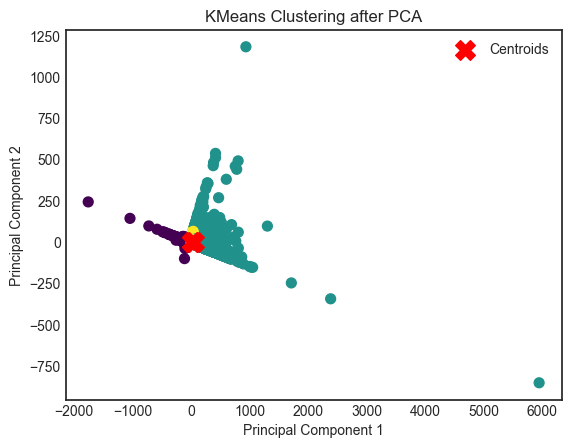

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

# lower the dimension
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_df)

# plot the cluster result
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [48]:
# group the dataset by cluster
filtered_df["cluster"] = labels
cluster_summary = filtered_df.groupby("cluster").mean()
print(cluster_summary)

/var/folders/d1/s2qxz98s235glk3wmsk815zc0000gn/T/ipykernel_4481/113954874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["cluster"] = labels


         fare_amount     extra   mta_tax  tip_amount  tolls_amount  \
cluster                                                              
0           8.271687  1.111192  0.495346    1.563730      0.002829   
1          53.767493  1.138623  0.446066    8.307878      4.528030   
2          23.119702  1.130610  0.490807    3.568600      0.865008   

         congestion_surcharge  total_amount  
cluster                                      
0                    2.354816     13.311877  
1                    1.605188     69.648320  
2                    2.069005     30.879828  


In [49]:
filtered_df["cluster"] = labels
print(filtered_df)

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0               6.00   3.00      0.5        1.47          0.00   
1               7.00   3.00      0.5        1.50          0.00   
2               6.00   3.00      0.5        1.00          0.00   
3               5.50   0.50      0.5        1.36          0.00   
4               3.50   0.50      0.5        0.00          0.00   
...              ...    ...      ...         ...           ...   
6405003        17.59   2.75      0.5        0.00          0.00   
6405004        46.67   2.75      0.5        0.00         12.24   
6405005        48.85   2.75      0.0        0.00          0.00   
6405006        27.17   2.75      0.0        0.00          0.00   
6405007        54.56   2.75      0.5        0.00          0.00   

         congestion_surcharge  total_amount  cluster  
0                         2.5         11.27        0  
1                         2.5         12.30        0  
2                         2.5         10.8

/var/folders/d1/s2qxz98s235glk3wmsk815zc0000gn/T/ipykernel_4481/95486418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["cluster"] = labels


In [50]:
trip_data["cluster"] = labels
print(trip_data)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1             1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2             1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3             1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4             2.0  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   
...           ...                  ...                   ...              ...   
6405003       NaN  2020-01-31 22:51:00   2020-01-31 23:22:00              NaN   
6405004       NaN  2020-01-31 22:10:00   2020-01-31 23:26:00              NaN   
6405005       NaN  2020-01-31 22:50:07   2020-01-31 23:17:57              NaN   
6405006       NaN  2020-01-31 22:25:53   2020-01-31 22:48:32              NaN   
6405007       NaN  2020-01-31 22:44:00   2020-01-31 23:06:00              NaN   

         trip_distance  Rat

In [51]:
#create a new column call trip ID to identify each row
trip_data['Trip_ID'] = range(1, len(trip_data) + 1)
# Create new dataframe to separte pickup from drop off
pickup = trip_data[['Trip_ID','tpep_pickup_datetime', 'PULocationID','cluster']].rename(
    columns={'tpep_pickup_datetime': 'datetime', 'PULocationID': 'LocationID'}
)
pickup['Point_Type'] = 'Pickup'
# Create drop off dataframe
dropoff = trip_data[['Trip_ID','tpep_dropoff_datetime', 'DOLocationID','cluster']].rename(
    columns={'tpep_dropoff_datetime': 'datetime', 'DOLocationID': 'LocationID'}
)
dropoff['Point_Type'] = 'Dropoff'

# combine pickup and drop off into one dataset
long_data = pd.concat([pickup, dropoff]).sort_values(by=['datetime'])


print(long_data)
# save the new dataframe to a CSV file
#long_data.to_csv('trip_paths.csv', index=False)

         Trip_ID             datetime  LocationID  cluster Point_Type
782435    782436  2003-01-01 00:07:17         193        0     Pickup
782435    782436  2003-01-01 14:16:59         193        0    Dropoff
5086498  5086499  2008-12-31 23:02:40          43        2     Pickup
1447622  1447623  2008-12-31 23:02:50         161        0     Pickup
5086894  5086895  2008-12-31 23:03:44         262        0     Pickup
...          ...                  ...         ...      ...        ...
275044    275045  2021-01-02 00:36:50         161        0    Dropoff
275045    275046  2021-01-02 00:44:08         170        0     Pickup
275045    275046  2021-01-02 00:58:56         148        0    Dropoff
275046    275047  2021-01-02 01:12:10          90        0     Pickup
275046    275047  2021-01-02 01:25:01         148        0    Dropoff

[12810016 rows x 5 columns]


In [52]:
# merge trip data with zone look up based on location ID
trip_data = trip_data.merge(zone_lookup, left_on="PULocationID", right_on="LocationID", how="left")
trip_data = trip_data.rename(columns={"Latitude": "PU_latitude", "Longitude": "PU_longitude", "Zone": "PU_zone"})

trip_data = trip_data.merge(zone_lookup, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("_PU", "_DO"))
trip_data = trip_data.rename(columns={"Latitude": "DO_latitude", "Longitude": "DO_longitude", "Zone": "DO_zone"})

**Result Evaluation:**

The red "X" marks representing the centroids are positioned close to the center of their respective clusters, which indicates a good fit for the majority of the data points in each cluster.
The data points within the clusters (green and purple regions) seem relatively compact, indicating decent within-cluster similarity.
